C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


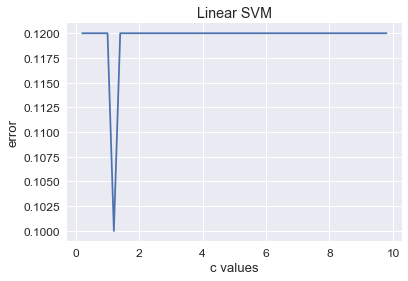

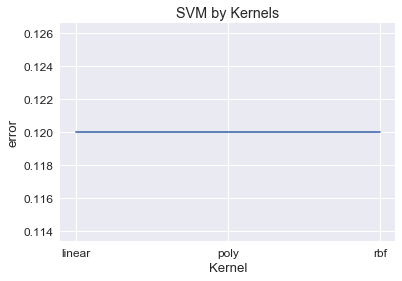

'\n## step 4 Select the best model and apply it over the testing subset \nbest_kernel = \'poly\'\nbest_c = 1 # poly had many that were the "best"\nmodel = svm.SVC(kernel=best_kernel, C=best_c)\nmodel.fit(X=x_train, y=y_train)\n\n## step 5 evaluate your results with the metrics you have developed in HA3,including accuracy, quantize your results. \n\n\ny_pred = model.predict(X_test)\nconf_matrix, accuracy, recall_array, precision_array = func_confusion_matrix(Y_test, y_pred)\n\nprint("Confusion Matrix: ")\nprint(conf_matrix)\nprint("Average Accuracy: {}".format(accuracy))\nprint("Per-Class Precision: {}".format(precision_array))\nprint("Per-Class Recall: {}".format(recall_array))\n\n'

In [87]:
#how support vector machien algorithm works (11 mins): https://www.youtube.com/watch?v=1NxnPkZM9bc
#svm: a visual explanation with sample python code (22 mins):https://www.youtube.com/watch?v=N1vOgolbjSc
# seaborn.lmplot: https://seaborn.pydata.org/generated/seaborn.lmplot.html

import numpy as np
import matplotlib.pyplot as plt
import sklearn.svm as svm
from sklearn import metrics

from pandas import read_table

import seaborn as sns; sns.set(font_scale=1.2)

def download_data(fileLocation):
    '''
    Downloads the data for this script into a pandas DataFrame. Uses columns indices provided
    '''

    frame = read_table(
        fileLocation,
        
        # Specify the file encoding
        # Latin-1 is common for data from US sources
        encoding='latin-1',
        #encoding='utf-8',  # UTF-8 is also common

        # Specify the separator in the data
        sep=',',            # comma separated values

        # Ignore spaces after the separator
        skipinitialspace=True,

        # Generate row labels from each row number
        index_col=None,

        # Generate column headers row from each column number
        header=None          # use the first line as headers       
    )

    # Return the entire frame
    return frame
#function [CM, acc, arrR, arrP]=func_confusion_matrix(teY, hatY)
def func_confusion_matrix(y_test, y_pred):
    """ this function is used to calculate the confusion matrix and a set of metrics.
    INPUT:
        y_test, ground-truth lables;
        y_pred, predicted labels;
    OUTPUT:
        CM, confuction matrix
        acc, accuracy
        arrR[], per-class recall rate,
        arrP[], per-class prediction rate.
    """

    y_test = np.array(y_test)
    y_pred = np.array(y_pred)

    unique_values = set(y_pred)
    sorted(unique_values)
    num_classes = len(unique_values)
    unique_values = np.array(list(unique_values)) # change to array so can use indexes
    possible_string_dict = {}
    # make sure all values are 0 based, so can use built-in "zip" function
    if(issubclass(type(y_test[0]), np.integer)): # if values are integers
        y_test_min = y_test.min()
        if(y_test_min != 0):# if does not contain 0, reduce both test and pred by min value to get 0 based for both
            y_test = y_test - y_test_min;
            y_pred = y_pred - y_test_min;
    else:
        # assume values are strings, change to integers
        # TODO, change to convert list from string to int
        y_test_int = np.empty(len(y_test), dtype=int)
        y_pred_int = np.empty(len(y_pred), dtype=int)
        for index in range(0, num_classes):
            current_value = unique_values[index]
            possible_string_dict[index] = current_value
            y_test_int[y_test == current_value] = index
            y_pred_int[y_pred == current_value] = index
        y_test = y_test_int
        y_pred = y_pred_int
       
    ## your code for creating confusion matrix;
    conf_matrix = np.zeros((num_classes, num_classes), dtype=np.int)
    for a, p in zip(y_test, y_pred):
        conf_matrix[a][p] += 1
 

    ## your code for calcuating acc;
    accuracy = conf_matrix.diagonal().sum() / conf_matrix.sum()
   
    ## your code for calcualting arrR and arrP;
    recall_array = np.empty(num_classes, dtype=float)
    precision_array = np.empty(num_classes, dtype=float)
    for index in range(0, num_classes):
        value = conf_matrix[index,index]
        recall_sum = conf_matrix[index,:].sum()
        precision_sum = conf_matrix[:, index].sum()
        recall_array[index] = value / recall_sum
        precision_array[index] = value / precision_sum
       
    return conf_matrix, accuracy, recall_array, precision_array


def get_confusion_matrix_and_test(y_test, y_pred):
    """ get confusion matrix, accuracy, array of recall and precision
        test confusion matrix and accuracy
    """
    cm, acc, arrR, arrP = func_confusion_matrix(y_test, y_pred)
    expected_matrix = metrics.confusion_matrix(y_test, y_pred)
    assert(np.array_equal(expected_matrix, cm))
    expected_acc = metrics.accuracy_score(y_test, y_pred)
    assert(round(expected_acc, 2) == round(acc, 2))
    return cm, acc, arrR, arrP

def _test_confusion_matrix():
    y_test = [1, 1, 1, 1, 1,
              2, 2, 2, 2, 2, 2, 2, 2,
              3, 3, 3, 3, 3, 3, 3]
    y_pred = [2, 1, 2, 2, 3,
              2, 2, 1, 1, 3, 3, 2, 1,
              1, 1, 3, 3, 2, 2, 3]
    cm, acc, arrR, arrP = get_confusion_matrix_and_test(y_test, y_pred)

def _perform1point1(confidence_threshold):
    y_test = ['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'N', 'N']
    y_pred_conf = [0.95, 0.83, 0.78, 0.53, 0.9, 0.2, 0.6, 0.8, 0.7, 0.5, 0.9, 0.2]
    num_elements = len(y_pred_conf)
    y_pred = np.empty(num_elements, dtype=object)
    for index in range(0, num_elements):
        if y_pred_conf[index] > confidence_threshold:
            y_pred[index] = 'Y'
        else:
            y_pred[index] = 'N'

    cm, acc, arrR, arrP = get_confusion_matrix_and_test(y_test, y_pred)
   

### Main function.  Not called if imported elsewhere as a module.
'''
if __name__ == "__main__":
    # test with example from previous Machine Learning class homework
    # _test_confusion_matrix()
    _perform1point1(0.6)
'''

#CS 596, machine learning

## step 1: load data from csv file. 
data = download_data('crab.csv').values#print(data)#[[ 0.  20.6 14.4 ... 46.5 19.6 -1. ]


n = 200
#split data 
S = np.random.permutation(n)#print(S.shape)#(200,)
#100 training samples
Xtr = data[S[:100], :6]#[[ 0.  14.  11.9 27.  31.4 12.6]
#print(Xtr.shape)#(100, 6)
Ytr = data[S[:100], 6:]#[[ 1.]
#print(Ytr.shape)#(100, 1)
# 100 testing samples
X_test = data[S[100:], :6]#[[ 1.  12.  11.1 25.4 29.2 11. ]
Y_test = data[S[100:], 6:].ravel()#[-1. -1.  1. -1. -1.  1. -1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1.  1.




## step 2 randomly split Xtr/Ytr into two even subsets: use one for training, another for validation.
#############placeholder: training/validation #######################
n2 = len(Xtr)
S2 = np.random.permutation(n2)
#print(S2)#[75 57 18 50 89 29 93 72 83 54 48 91 80 22 11 17 97 71 56 73 90 35 10 44
half = int(n2/2)#50

 
# subsets for training models
x_train= Xtr[:half]#[[ 1.  17.7 13.6 38.7 44.5 16. ]
y_train= Ytr[:half]
# subsets for validation
x_validation= Xtr[half:]
y_validation= Ytr[half:]
#############placeholder #######################

## step 3 Model selection over validation set
# consider the parameters C, kernel types (linear, RBF etc.) and kernal
# parameters if applicable. 


# 3.1 Plot the validation errors while using different values of C ( with other hyperparameters fixed) 
#  keeping kernel = "linear"
#############placeholder: Figure 1#######################

c_range =  [] #
for i in range(1,len(x_validation)):
    j=i/5
    c_range.append(j)
svm_c_error = []
for c_value in c_range:
    model = svm.SVC(kernel='linear', C=c_value)
    model.fit(X=x_train, y=y_train)
    error = 1. - model.score(x_validation, y_validation)
    svm_c_error.append(error)
plt.plot(c_range, svm_c_error)
plt.title('Linear SVM')
plt.xlabel('c values')
plt.ylabel('error')
#plt.xticks(c_range)
plt.show()
#############placeholder #######################


# 3.2 Plot the validation errors while using linear, RBF kernel, or Polynomial kernel ( with other hyperparameters fixed) 
#############placeholder: Figure 2#######################
kernel_types = ['linear', 'poly', 'rbf']
svm_kernel_error = []
for kernel_value in kernel_types:
    # your own codes

    error = 1. - model.score(x_validation, y_validation)
    svm_kernel_error.append(error)

plt.plot(kernel_types, svm_kernel_error)
plt.title('SVM by Kernels')
plt.xlabel('Kernel')
plt.ylabel('error')
plt.xticks(kernel_types)
plt.show()

'''
## step 4 Select the best model and apply it over the testing subset 
best_kernel = 'poly'
best_c = 1 # poly had many that were the "best"
model = svm.SVC(kernel=best_kernel, C=best_c)
model.fit(X=x_train, y=y_train)

## step 5 evaluate your results with the metrics you have developed in HA3,including accuracy, quantize your results. 


y_pred = model.predict(X_test)
conf_matrix, accuracy, recall_array, precision_array = func_confusion_matrix(Y_test, y_pred)

print("Confusion Matrix: ")
print(conf_matrix)
print("Average Accuracy: {}".format(accuracy))
print("Per-Class Precision: {}".format(precision_array))
print("Per-Class Recall: {}".format(recall_array))

'''
